[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gsg213/Computer_Vision_DL/blob/master/CNN/VGG16.ipynb)

# VGG16
Building and training a reduced VGG16 model with Tensorflow




In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as LK 
import tensorflow.keras.models as MK 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test)= mnist.load_data() 


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
print('Train imagessize=%s, labelsize=%s' %(x_train.shape, y_train.shape))
print('Test imagessize=%s, labelsize=%s' %(x_test.shape, y_test.shape))
print("Test images size= {0} , Label size ={1}".format(x_test.shape, y_test.shape))

Train imagessize=(60000, 28, 28), labelsize=(60000,)
Test imagessize=(10000, 28, 28), labelsize=(10000,)
Test images size= (10000, 28, 28) , Label size =(10000,)


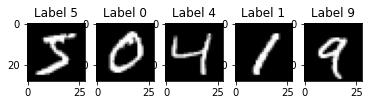

In [ ]:
from matplotlib import pyplot as plt
for i in range(5): 
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.gca().set_title('Label ' + str(y_train[i])) 
plt.show()

**Normalizing**

In [ ]:
x_train= x_train.reshape((x_train.shape[0],28,28,1))
x_test= x_test.reshape((x_test.shape[0],28,28,1))
print("Test images size= {0} , Label size ={1}".format(x_test.shape, y_test.shape))


Test images size= (10000, 28, 28, 1) , Label size =(10000,)


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train, x_test = (x_train-x_train.min())/(x_train.max()-x_train.min()), (x_test-x_test.min())/(x_test.max()-x_test.min()) #Normaliza

In [ ]:
tf.keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session>

In [ ]:
from keras.optimizers import SGD
from keras.optimizers import Adam

In [ ]:
def crear_modelo():
   inputs = LK.Input(shape=(28,28,1)) 
   conv1 = LK.Conv2D(6,(5,5),padding='same', activation='relu')(inputs)
   pool1 = LK.MaxPool2D((2,2),(2,2))(conv1) #Maxpool f=2, s=2
   conv2 = LK.Conv2D(16,(5,5),padding='valid', activation='relu')(pool1) 
   pool2 = LK.MaxPool2D((2,2),(2,2))(conv2) #Maxpool f=2, s=2
   flat =  LK.Flatten()(pool2) 
   FC3 = LK.Dense(120,activation='relu')(flat)
   FC4 = LK.Dense(84,activation='relu')(FC3)
   outputs = LK.Dense(10,activation='softmax')(FC4)
   
   return MK.Model(inputs,outputs)                                           


In [ ]:
estrategia = tf.device('/device:GPU:0')
optimo ='adam' #SGD(lr=0.001, momentum=0.9)#'adagrad'#Adam(lr=0.001)#'adam' #'adagrad' #SGD(lr=0.005, momentum=0.9) #0.01  0.001
with estrategia:
  model= crear_modelo() 
  model.compile(optimizer=optimo, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               4812

## Training

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)

In [ ]:
history =model.fit(x_train,y_train, epochs=10, batch_size=32,validation_data=(x_test, y_test), verbose=1, callbacks=[es])
loss,acc= model.evaluate(x_test,y_test,verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss,acc) ) 


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4062 - accuracy: 0.8747 - val_loss: 0.0678 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0539 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9868 - val_loss: 0.0477 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0358 - val_accuracy: 0.9896
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0364 - val_accuracy:

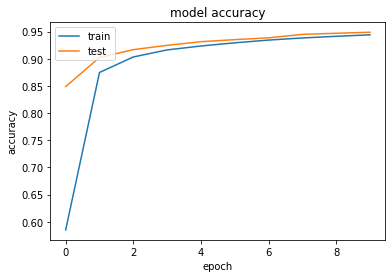

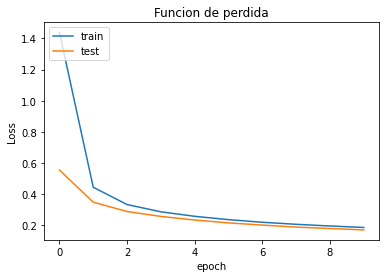

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Funcion de perdida')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import img_to_array
model.save('mnistown.h5')
from keras.models import load_model
modelo= load_model('mnistown.h5')
etiquetas = ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']

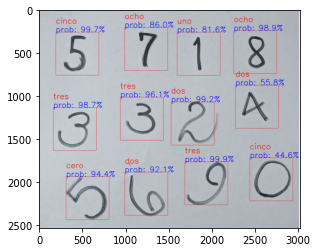

In [ ]:
im = cv2.imread('real_hw.jpg')

imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((45,45),np.uint8)
kernel2 = np.ones((5,5),np.uint8)
erosion = cv2.erode(thresh ,kernel2,iterations = 2)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
contours, hierarchy = cv2.findContours(dilation,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    (x, y), radius = cv2.minEnclosingCircle(c)
    w=250
    h= 250
    cv2.rectangle(im, (int(x)-w, int(y)-h), (int(x)+w, int(y)+h), (255, 0, 0), 2)
    crop_img = dilation[int(y)-h:int(y)+h, int(x)-w:int(x)+w]
    crop_img_r = cv2.resize(crop_img, (28,28), interpolation = cv2.INTER_LINEAR)
    
    crop_img_r.reshape((-1,28,28,1))
    crop_img_ra = img_to_array(crop_img_r)
    crop_img_ra = np.expand_dims(crop_img_ra, axis=0)
    crop_img_ra = crop_img_ra.astype('float32')
    crop_img_ra = crop_img_ra/255.0
    resultado = modelo.predict(crop_img_ra)
    
    cv2.putText(im, 
                str(etiquetas[(np.argmax(resultado,axis=1))[0]]) , (int(x)-w,int(y)-h-100), cv2.FONT_HERSHEY_SIMPLEX ,  
                   3, (255,0,0), 4, cv2.LINE_AA) 
    cv2.putText(im, 
                "prob: " + str(round(np.max(resultado)*100,1)) + "%", (int(x)-w,int(y)-h), cv2.FONT_HERSHEY_SIMPLEX ,  
                   3, (0,0,255), 4, cv2.LINE_AA) 
plt.imshow(im)
plt.show()